# Company Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler

In [2]:
data_raw = pd.read_csv(r'D:\z Data Science\Assignment\Assignment\Assignment 12\Company_Data.csv')

In [3]:
data = data_raw.copy()

In [4]:
x = 0
for i in data_raw['Sales']:
    if i < np.percentile(data_raw['Sales'] , 25):
        data['Sales'][x] = 'Low'
    elif np.percentile(data_raw['Sales'], 25) <= i < np.percentile(data_raw['Sales'], 75):
        data['Sales'][x] = 'Average'
    else:
        data['Sales'][x] = 'High'
    x += 1
data

<ipython-input-4-7ce6e1db64e5>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Sales'][x] = 'High'
C:\Users\akshp\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
<ipython-input-4-7ce6e1db64e5>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Sales'][x] = 'Average'
<ipython-input-4-7ce6e1db64e5>:4: SettingWithCopyWarning: 
A va

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,High,138,73,11,276,120,Bad,42,17,Yes,Yes
1,High,111,48,16,260,83,Good,65,10,Yes,Yes
2,High,113,35,10,269,80,Medium,59,12,Yes,Yes
3,Average,117,100,4,466,97,Medium,55,14,Yes,Yes
4,Low,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,High,138,108,17,203,128,Good,33,14,Yes,Yes
396,Average,139,23,3,37,120,Medium,55,11,No,Yes
397,Average,162,26,12,368,159,Medium,40,18,Yes,Yes
398,Average,100,79,7,284,95,Bad,50,12,Yes,Yes


In [5]:
X = data.drop('Sales', axis = 1)
y = data['Sales']

In [6]:
X['ShelveLoc'] = X['ShelveLoc'].map({'Bad' : 0, 'Medium' : 1, 'Good' : 3})
X['Urban'] = X['Urban'].map({'No' : 0, 'Yes' : 1})
X['US'] = X['US'].map({'No' : 0, 'Yes' : 1})
X

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,0,42,17,1,1
1,111,48,16,260,83,3,65,10,1,1
2,113,35,10,269,80,1,59,12,1,1
3,117,100,4,466,97,1,55,14,1,1
4,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,3,33,14,1,1
396,139,23,3,37,120,1,55,11,0,1
397,162,26,12,368,159,1,40,18,1,1
398,100,79,7,284,95,0,50,12,1,1


In [7]:
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = 42)

In [9]:
kfold = KFold(10)
accuracy = []
for i in range (1,201):
    forest = RandomForestClassifier(random_state = 42, n_estimators = i)
    result = cross_val_score(forest, X, y, cv = kfold)
    accuracy.append(np.mean(result))
accuracy

[0.5125,
 0.5650000000000001,
 0.5875,
 0.6024999999999999,
 0.5950000000000001,
 0.6025,
 0.61,
 0.6050000000000001,
 0.595,
 0.6024999999999999,
 0.5925,
 0.595,
 0.615,
 0.61,
 0.625,
 0.6149999999999999,
 0.6100000000000001,
 0.6249999999999999,
 0.6425,
 0.6475,
 0.6525000000000001,
 0.655,
 0.66,
 0.655,
 0.6475,
 0.6575,
 0.65,
 0.65,
 0.665,
 0.6675,
 0.675,
 0.665,
 0.6699999999999999,
 0.6625,
 0.6725,
 0.6725000000000001,
 0.6725000000000001,
 0.6675,
 0.6675,
 0.6675,
 0.6725000000000001,
 0.6725,
 0.6725,
 0.675,
 0.6799999999999999,
 0.6725000000000001,
 0.68,
 0.6849999999999999,
 0.6775,
 0.675,
 0.67,
 0.6799999999999999,
 0.6799999999999999,
 0.6775,
 0.6825,
 0.6775,
 0.675,
 0.6724999999999999,
 0.6775,
 0.6775,
 0.685,
 0.6825,
 0.6875,
 0.6775,
 0.685,
 0.6799999999999999,
 0.6799999999999999,
 0.6775,
 0.6799999999999999,
 0.6824999999999999,
 0.6849999999999999,
 0.6799999999999999,
 0.6799999999999999,
 0.6825,
 0.6875,
 0.69,
 0.6975,
 0.6874999999999999,
 0.7

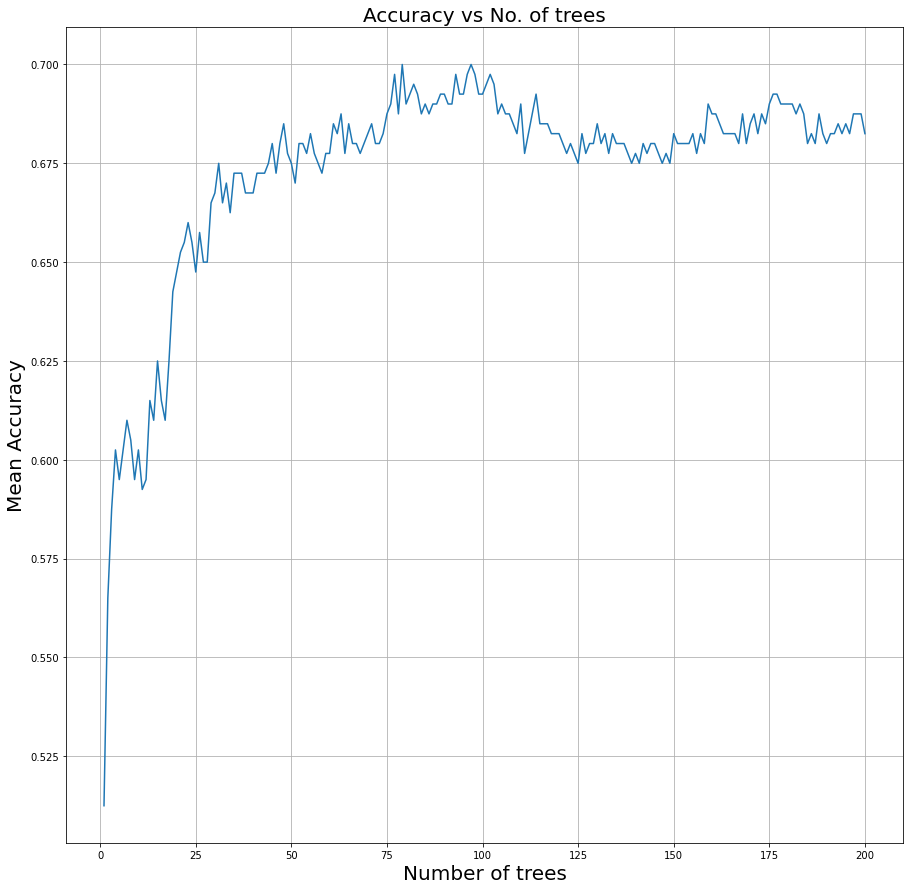

In [10]:
plt.figure(figsize = (15,15))
plt.plot(range(1,201), accuracy)
plt.xlabel('Number of trees', fontsize = 20)
plt.ylabel('Mean Accuracy', fontsize = 20)
plt.title('Accuracy vs No. of trees', fontsize = 20)
plt.grid()
plt.show()

In [11]:
n_est_ideal = accuracy.index(max(accuracy))

In [12]:

forest = RandomForestClassifier(n_estimators = n_est_ideal, random_state = 42)
forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=96, random_state=42)

In [13]:
predictions = forest.predict(X_test)
np.mean(predictions == y_test)

0.7

In [14]:
cf_mat = confusion_matrix(y_test, predictions)
cf_mat

array([[32,  4,  4],
       [ 8, 15,  0],
       [ 8,  0,  9]], dtype=int64)

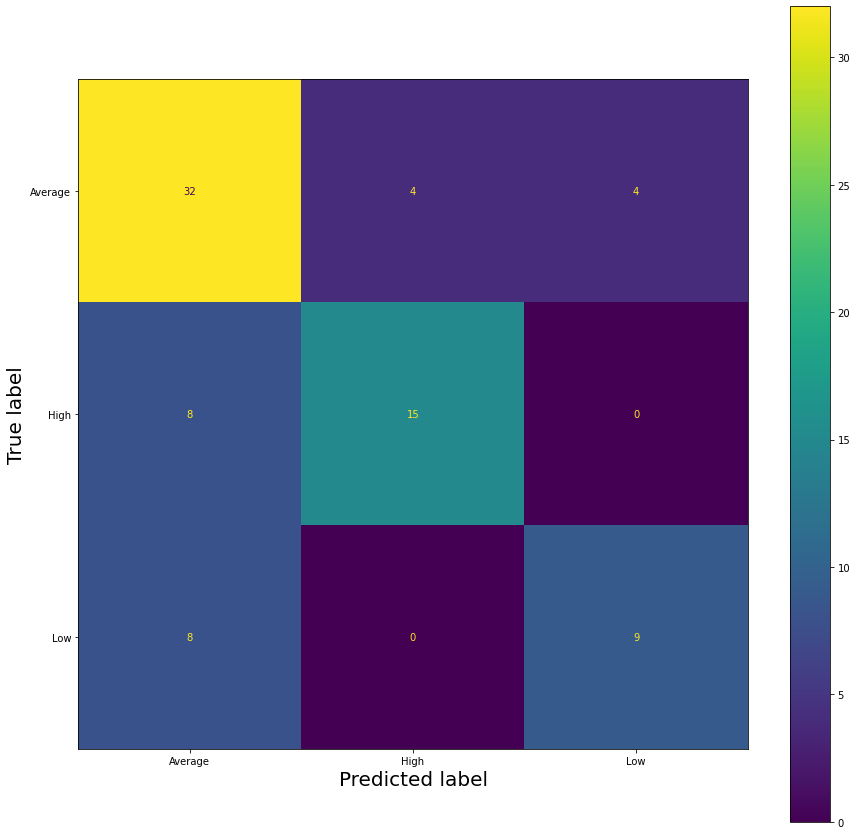

In [15]:
fig, ax = plt.subplots(figsize = (15,15))
plot_confusion_matrix(forest, X_test, y_test, ax = ax)
ax.set_xlabel('Predicted label', fontsize = 20)
ax.set_ylabel('True label', fontsize = 20)
plt.show()

# 2 - Fraud Dataset

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [17]:
data_raw = pd.read_csv(r'D:\z Data Science\Assignment\Assignment\Assignment 12\Fraud_check.csv')
data_raw

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [18]:
data = data_raw.copy()
x = 0
for i in data_raw['Taxable.Income']:
    if i <= 30000:
        data['Taxable.Income'][x] = 'Risky'
    else:
        data['Taxable.Income'][x] = 'Good'
    x += 1
data

<ipython-input-18-1f92bf44be96>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Taxable.Income'][x] = 'Good'
C:\Users\akshp\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
<ipython-input-18-1f92bf44be96>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Taxable.Income'][x] = 'Risky'


,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,Good,50047,10,YES
1,YES,Divorced,Good,134075,18,YES
2,NO,Married,Good,160205,30,YES
3,YES,Single,Good,193264,15,YES
4,NO,Married,Good,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,Good,39492,7,YES
596,YES,Divorced,Good,55369,2,YES
597,NO,Divorced,Good,154058,0,YES
598,YES,Married,Good,180083,17,NO


In [19]:
y = data['Taxable.Income']
X = data.drop('Taxable.Income', axis = 1)
X['Undergrad'] = X['Undergrad'].map({'NO' : 0, 'YES' : 1})
X['Marital.Status'] = X['Marital.Status'].map({'Single' : 0, 'Married' : 1, 'Divorced' : 2})
X['Urban'] = X['Urban'].map({'NO' : 0, 'YES' : 1})
X

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
0,0,0,50047,10,1
1,1,2,134075,18,1
2,0,1,160205,30,1
3,1,0,193264,15,1
4,0,1,27533,28,0
...,...,...,...,...,...
595,1,2,39492,7,1
596,1,2,55369,2,1
597,0,2,154058,0,1
598,1,1,180083,17,0


In [20]:
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.2)

In [22]:
kfold = KFold(10)
accuracy = []
for i in range(1,201):
    forest = RandomForestClassifier(n_estimators = i)
    results = cross_val_score(forest, X, y, cv = kfold)
    accuracy.append(np.mean(results))
accuracy

[0.635,
 0.7433333333333333,
 0.7066666666666667,
 0.74,
 0.7283333333333334,
 0.7416666666666666,
 0.7233333333333333,
 0.7416666666666666,
 0.7383333333333333,
 0.7383333333333333,
 0.7266666666666667,
 0.7383333333333333,
 0.7499999999999999,
 0.7333333333333334,
 0.73,
 0.7383333333333333,
 0.7383333333333334,
 0.7449999999999999,
 0.7266666666666667,
 0.7333333333333333,
 0.7333333333333333,
 0.7466666666666667,
 0.7366666666666667,
 0.7366666666666666,
 0.7316666666666667,
 0.73,
 0.7383333333333333,
 0.7583333333333334,
 0.7483333333333333,
 0.7533333333333333,
 0.7466666666666666,
 0.7483333333333333,
 0.74,
 0.74,
 0.7416666666666666,
 0.7433333333333334,
 0.7483333333333333,
 0.7566666666666666,
 0.74,
 0.75,
 0.7333333333333333,
 0.7383333333333333,
 0.7366666666666667,
 0.7533333333333333,
 0.7416666666666667,
 0.7466666666666667,
 0.7166666666666666,
 0.7383333333333333,
 0.7466666666666667,
 0.7416666666666666,
 0.72,
 0.7266666666666667,
 0.74,
 0.7449999999999999,
 0.73

In [23]:
n_est_ideal = accuracy.index(max(accuracy[2:]))
n_est_ideal

27

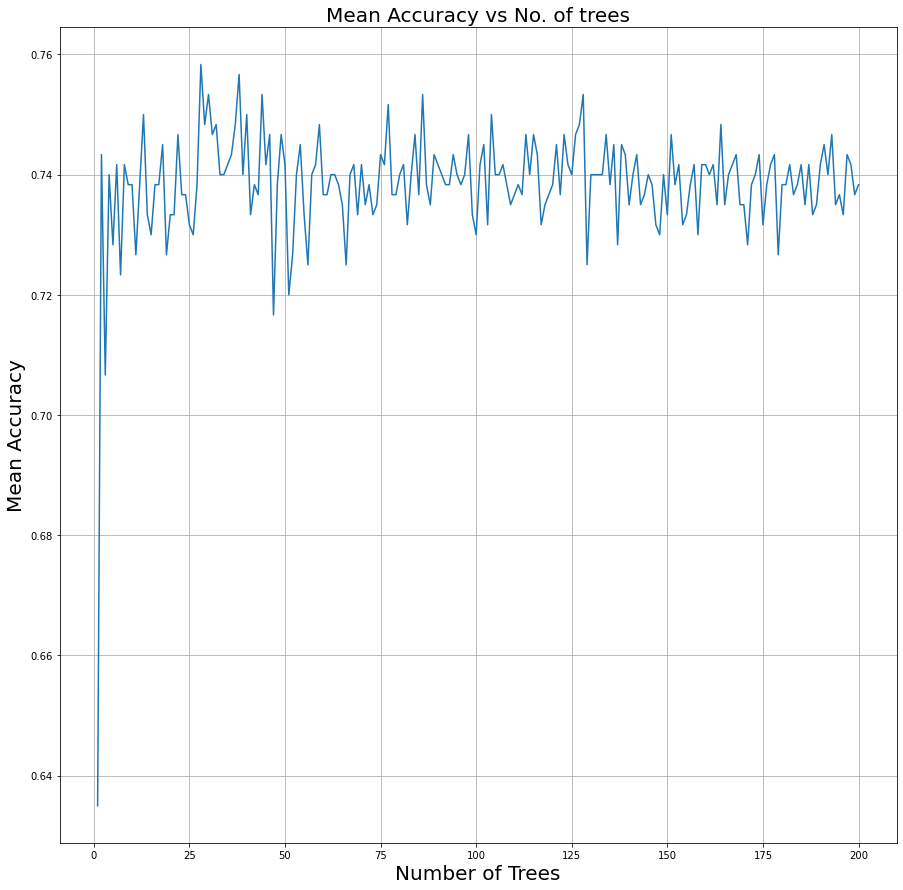

In [24]:
plt.figure(figsize = (15,15))
plt.plot(range(1,201), accuracy)
plt.xlabel('Number of Trees', fontsize = 20)
plt.ylabel('Mean Accuracy', fontsize = 20)
plt.title('Mean Accuracy vs No. of trees', fontsize = 20)
plt.grid()

In [25]:
forest = RandomForestClassifier(random_state = 42, n_estimators = n_est_ideal)
forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=27, random_state=42)

In [26]:
predictions = forest.predict(X_test)
np.mean(predictions == y_test)

0.7333333333333333

In [27]:
cf_mat = confusion_matrix(y_test, predictions)
cf_mat

array([[88,  6],
       [26,  0]], dtype=int64)

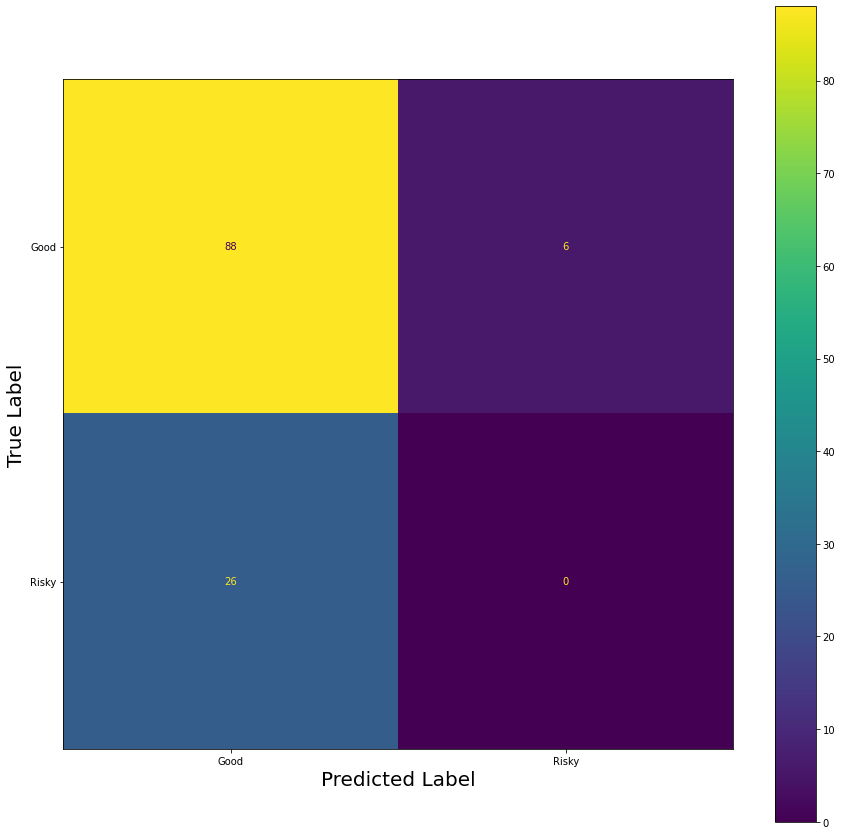

In [28]:
fig, ax = plt.subplots(figsize = (15,15))
plot_confusion_matrix(forest, X_test, y_test, ax = ax)
ax.set_xlabel('Predicted Label', fontsize = 20)
ax.set_ylabel('True Label', fontsize = 20)
plt.show()

# XGBM Model;

In [30]:
!pip install xgboost

In [31]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [38]:
data_raw = pd.read_csv(r'D:\z Data Science\Assignment\Assignment\Assignment 12\Fraud_check.csv')
data_raw

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [39]:
data = data_raw.copy()
x = 0
for i in data_raw['Taxable.Income']:
    if i <= 30000:
        data['Taxable.Income'][x] = 'Risky'
    else:
        data['Taxable.Income'][x] = 'Good'
    x += 1
data

<ipython-input-39-1f92bf44be96>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Taxable.Income'][x] = 'Good'
C:\Users\akshp\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
<ipython-input-39-1f92bf44be96>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Taxable.Income'][x] = 'Risky'


,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,Good,50047,10,YES
1,YES,Divorced,Good,134075,18,YES
2,NO,Married,Good,160205,30,YES
3,YES,Single,Good,193264,15,YES
4,NO,Married,Good,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,Good,39492,7,YES
596,YES,Divorced,Good,55369,2,YES
597,NO,Divorced,Good,154058,0,YES
598,YES,Married,Good,180083,17,NO


In [41]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
data['Taxable.Income']= label_encoder.fit_transform(data['Taxable.Income']) 

In [42]:
y = data['Taxable.Income']
X = data.drop('Taxable.Income', axis = 1)
X['Undergrad'] = X['Undergrad'].map({'NO' : 0, 'YES' : 1})
X['Marital.Status'] = X['Marital.Status'].map({'Single' : 0, 'Married' : 1, 'Divorced' : 2})
X['Urban'] = X['Urban'].map({'NO' : 0, 'YES' : 1})
X

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
0,0,0,50047,10,1
1,1,2,134075,18,1
2,0,1,160205,30,1
3,1,0,193264,15,1
4,0,1,27533,28,0
...,...,...,...,...,...
595,1,2,39492,7,1
596,1,2,55369,2,1
597,0,2,154058,0,1
598,1,1,180083,17,0


In [43]:
y

0      0
1      0
2      0
3      0
4      0
      ..
595    0
596    0
597    0
598    0
599    0
Name: Taxable.Income, Length: 600, dtype: int32

In [44]:
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)


In [45]:
model = XGBClassifier()
model.fit(X_train, y_train)

[14:02:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\akshp\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [46]:
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]


In [47]:
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 69.70%


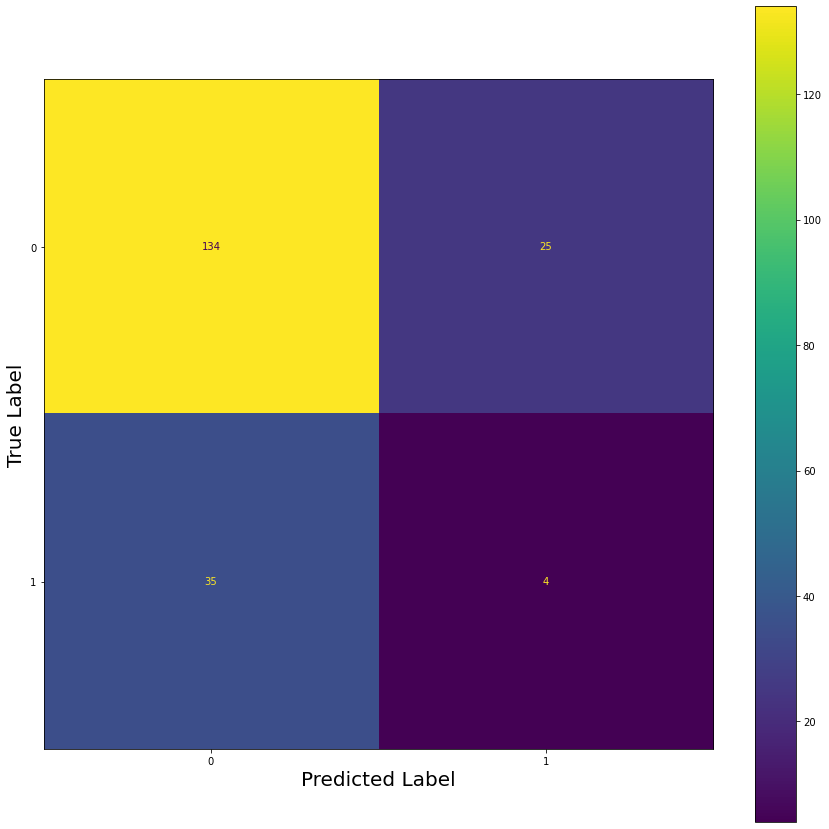

In [48]:
fig, ax = plt.subplots(figsize = (15,15))
plot_confusion_matrix(model, X_test, y_test, ax = ax)
ax.set_xlabel('Predicted Label', fontsize = 20)
ax.set_ylabel('True Label', fontsize = 20)
plt.show()